# Assignment 3
### Due 9/21. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/nhanes_data_17_18.csv')

/var/folders/1z/t_vl0dx95552hzn7xv8z08sm0000gn/T/ipykernel_10537/2969583459.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/nhanes_data_17_18.csv')


In [3]:
df.head()

,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
x = df['MaritalStatus']
x.value_counts(dropna=False)

MaritalStatus
NaN                    3106
Married                2616
Never married           948
Divorced                597
Living with partner     478
Widowed                 427
Separated               194
Name: count, dtype: int64

In [5]:
3106/len(x)

0.37126464260100406

Missing values make up about 37% of the marital status variable, which is a significant amount.

In [6]:
y = df['GeneralHealthCondition']
y.value_counts(dropna=False)

GeneralHealthCondition
Good         2454
NaN          2402
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

In [7]:
2402/len(y)

0.2871145111164236

Missing values make up about 28% of the general health condition variable, which is also a significant amout of missing data points.

In [8]:
# make a variable stating whether or not the GeneralHealthCondition variable is a missing value for each row
df['health_na'] = df['GeneralHealthCondition'].isna()

In [9]:
pd.crosstab(x, df['health_na'], normalize='columns')

health_na,False,True
MaritalStatus,,
Divorced,0.115046,0.093333
Living with partner,0.092528,0.069333
Married,0.496827,0.504000
Never married,0.181781,0.160000
Separated,0.037052,0.034667
Widowed,0.076766,0.138667


From the contingency table between the MaritalStatus and health_na variables, there doesn't seem to be a pattern in the presence of missing values. About half of the data points in both the False and True groups fall in the married MaritalStatus group, which is much more than any other group on its own.

In [10]:
pd.crosstab(x,y, normalize='columns')

GeneralHealthCondition,Excellent,Fair or,Good,Poor?,Very good
MaritalStatus,,,,,
Divorced,0.076555,0.134935,0.111003,0.16250,0.111016
Living with partner,0.095694,0.102588,0.099805,0.12500,0.064902
Married,0.555024,0.429760,0.499026,0.37500,0.550811
Never married,0.212919,0.186691,0.174781,0.13750,0.184458
Separated,0.023923,0.050832,0.037975,0.06875,0.023057
Widowed,0.035885,0.095194,0.077410,0.13125,0.065756


In the contingency table between MaritalStatus and GeneralHealthCondition itself, I intuitively expected to see a pattern of married people taking up a higher proportion in the better health categories (Excellent, Very Good, Good) than in the lower ones (Fair, Poor). However, the proportion of married people was around the same (around 50%) across the categories except for the poor category, where the proportion drops from around 50% to around 37% and people who are divorced, living with their partner, never been married, and are widowed increased slightly and were around the same proportion (around 14%).

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [11]:
# Using the same X (we know about missing values for marital status already)

x = df['MaritalStatus']
y = df['BodyMassIndexKgm2']

In [12]:
bmi_na = y.isna()
bmi_na.value_counts()

BodyMassIndexKgm2
False    8005
True      361
Name: count, dtype: int64

There are significantly less missing values of BMI (only 361) than there are for marital status, which had around 3000 missing values. This makes sense, because upon reading about the NHANES dataset, the bodily meausrements are taken within the lab that the participants are in, as opposed the survey portion where people can choose not to answer questions.

In [13]:
# Show GroupBy table of BodyMassIndex
df.loc[:,['BodyMassIndexKgm2', 'MaritalStatus']].groupby('MaritalStatus').describe()

BodyMassIndexKgm2                                     \
                                count       mean       std   min     25%   
MaritalStatus                                                              
Divorced                        583.0  29.891252  7.377802  14.9  25.150   
Living with partner             474.0  30.042616  7.356092  15.5  25.300   
Married                        2588.0  29.807110  6.990423  14.8  25.100   
Never married                   929.0  29.681916  8.533571  15.7  23.600   
Separated                       190.0  31.074737  7.904857  18.2  25.125   
Widowed                         406.0  29.673892  6.924019  14.2  24.900   

                                          
                       50%     75%   max  
MaritalStatus                             
Divorced             29.20  33.400  74.8  
Living with partner  28.90  33.475  64.2  
Married              28.50  33.400  84.4  
Never married        28.20  33.900  86.2  
Separated            29.25  35.075  60.6  
Widowed              28.80  33.875  63.4

<Axes: xlabel='BodyMassIndexKgm2', ylabel='Count'>

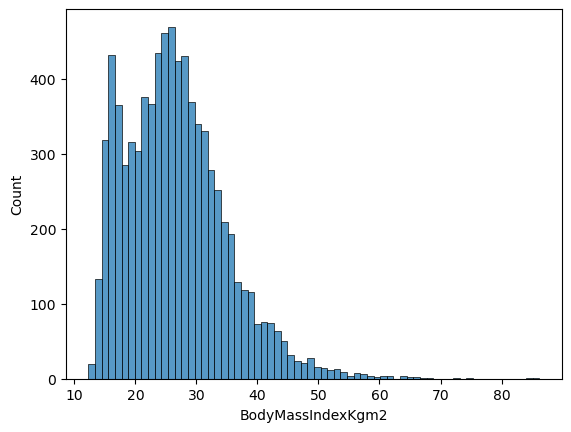

In [14]:
# Raw Data 
sns.histplot(data=df,x='BodyMassIndexKgm2')

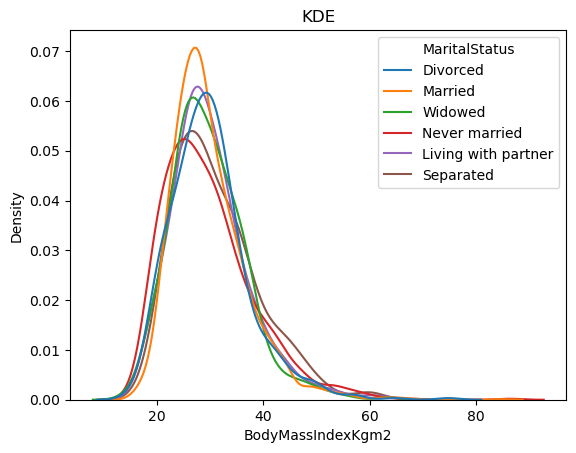

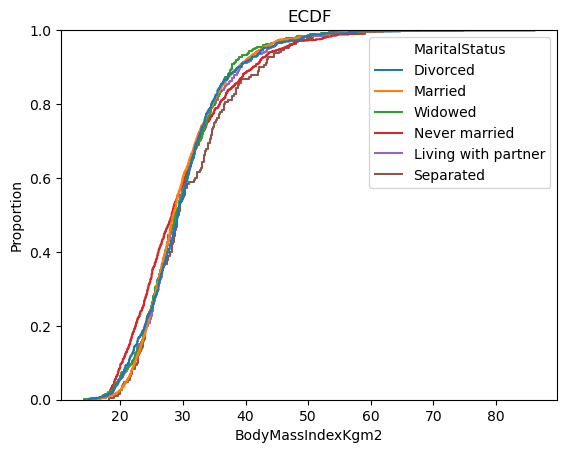

In [15]:
sns.kdeplot(data=df, x='BodyMassIndexKgm2', hue='MaritalStatus', common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot(data=df, x='BodyMassIndexKgm2', hue='MaritalStatus').set(title='ECDF')
plt.show()

The data seemed to be skewed to the right overall, which makes sense because most people do not have extremely large BMIs, but I wanted to see what the plots would look like with a transformation so I did a log transformation.

<Axes: xlabel='BodyMassIndexKgm2', ylabel='Count'>

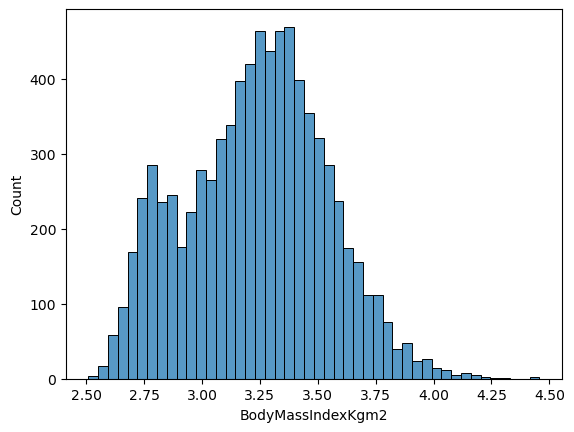

In [16]:
# With Log Transformation
sns.histplot(data=df,x=np.log(df['BodyMassIndexKgm2']))

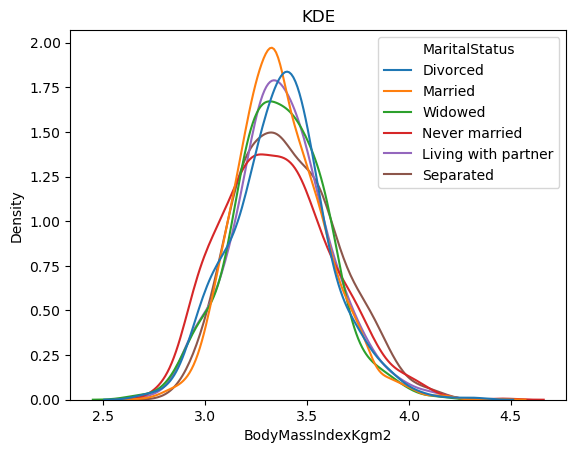

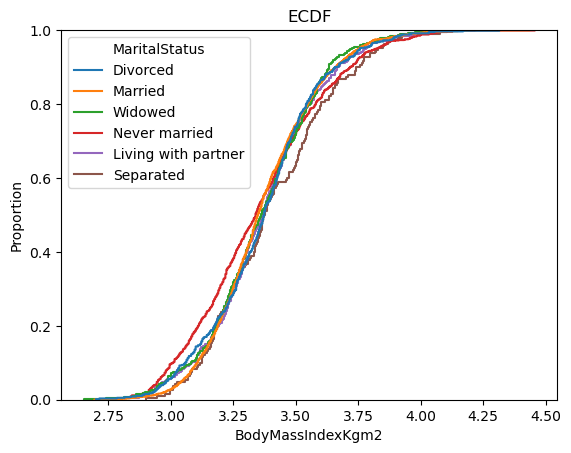

In [17]:
sns.kdeplot(data=df, x=np.log(df['BodyMassIndexKgm2']), hue='MaritalStatus', common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot(data=df, x=np.log(df['BodyMassIndexKgm2']), hue='MaritalStatus').set(title='ECDF')
plt.show()

In both the raw data and the log transformed data, there does not seem to be much of a difference in distribution of body mass index across the different marital status groups. This is and isn't surprising to me. I've heard of happy weight in relationships, so I thought there may be a visible difference, but looking at the plot and seeing that the different groups' BMIs are all distributed pretty similarly makes sense as people are a wide range of shapes and sizes within or outside of relationships.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

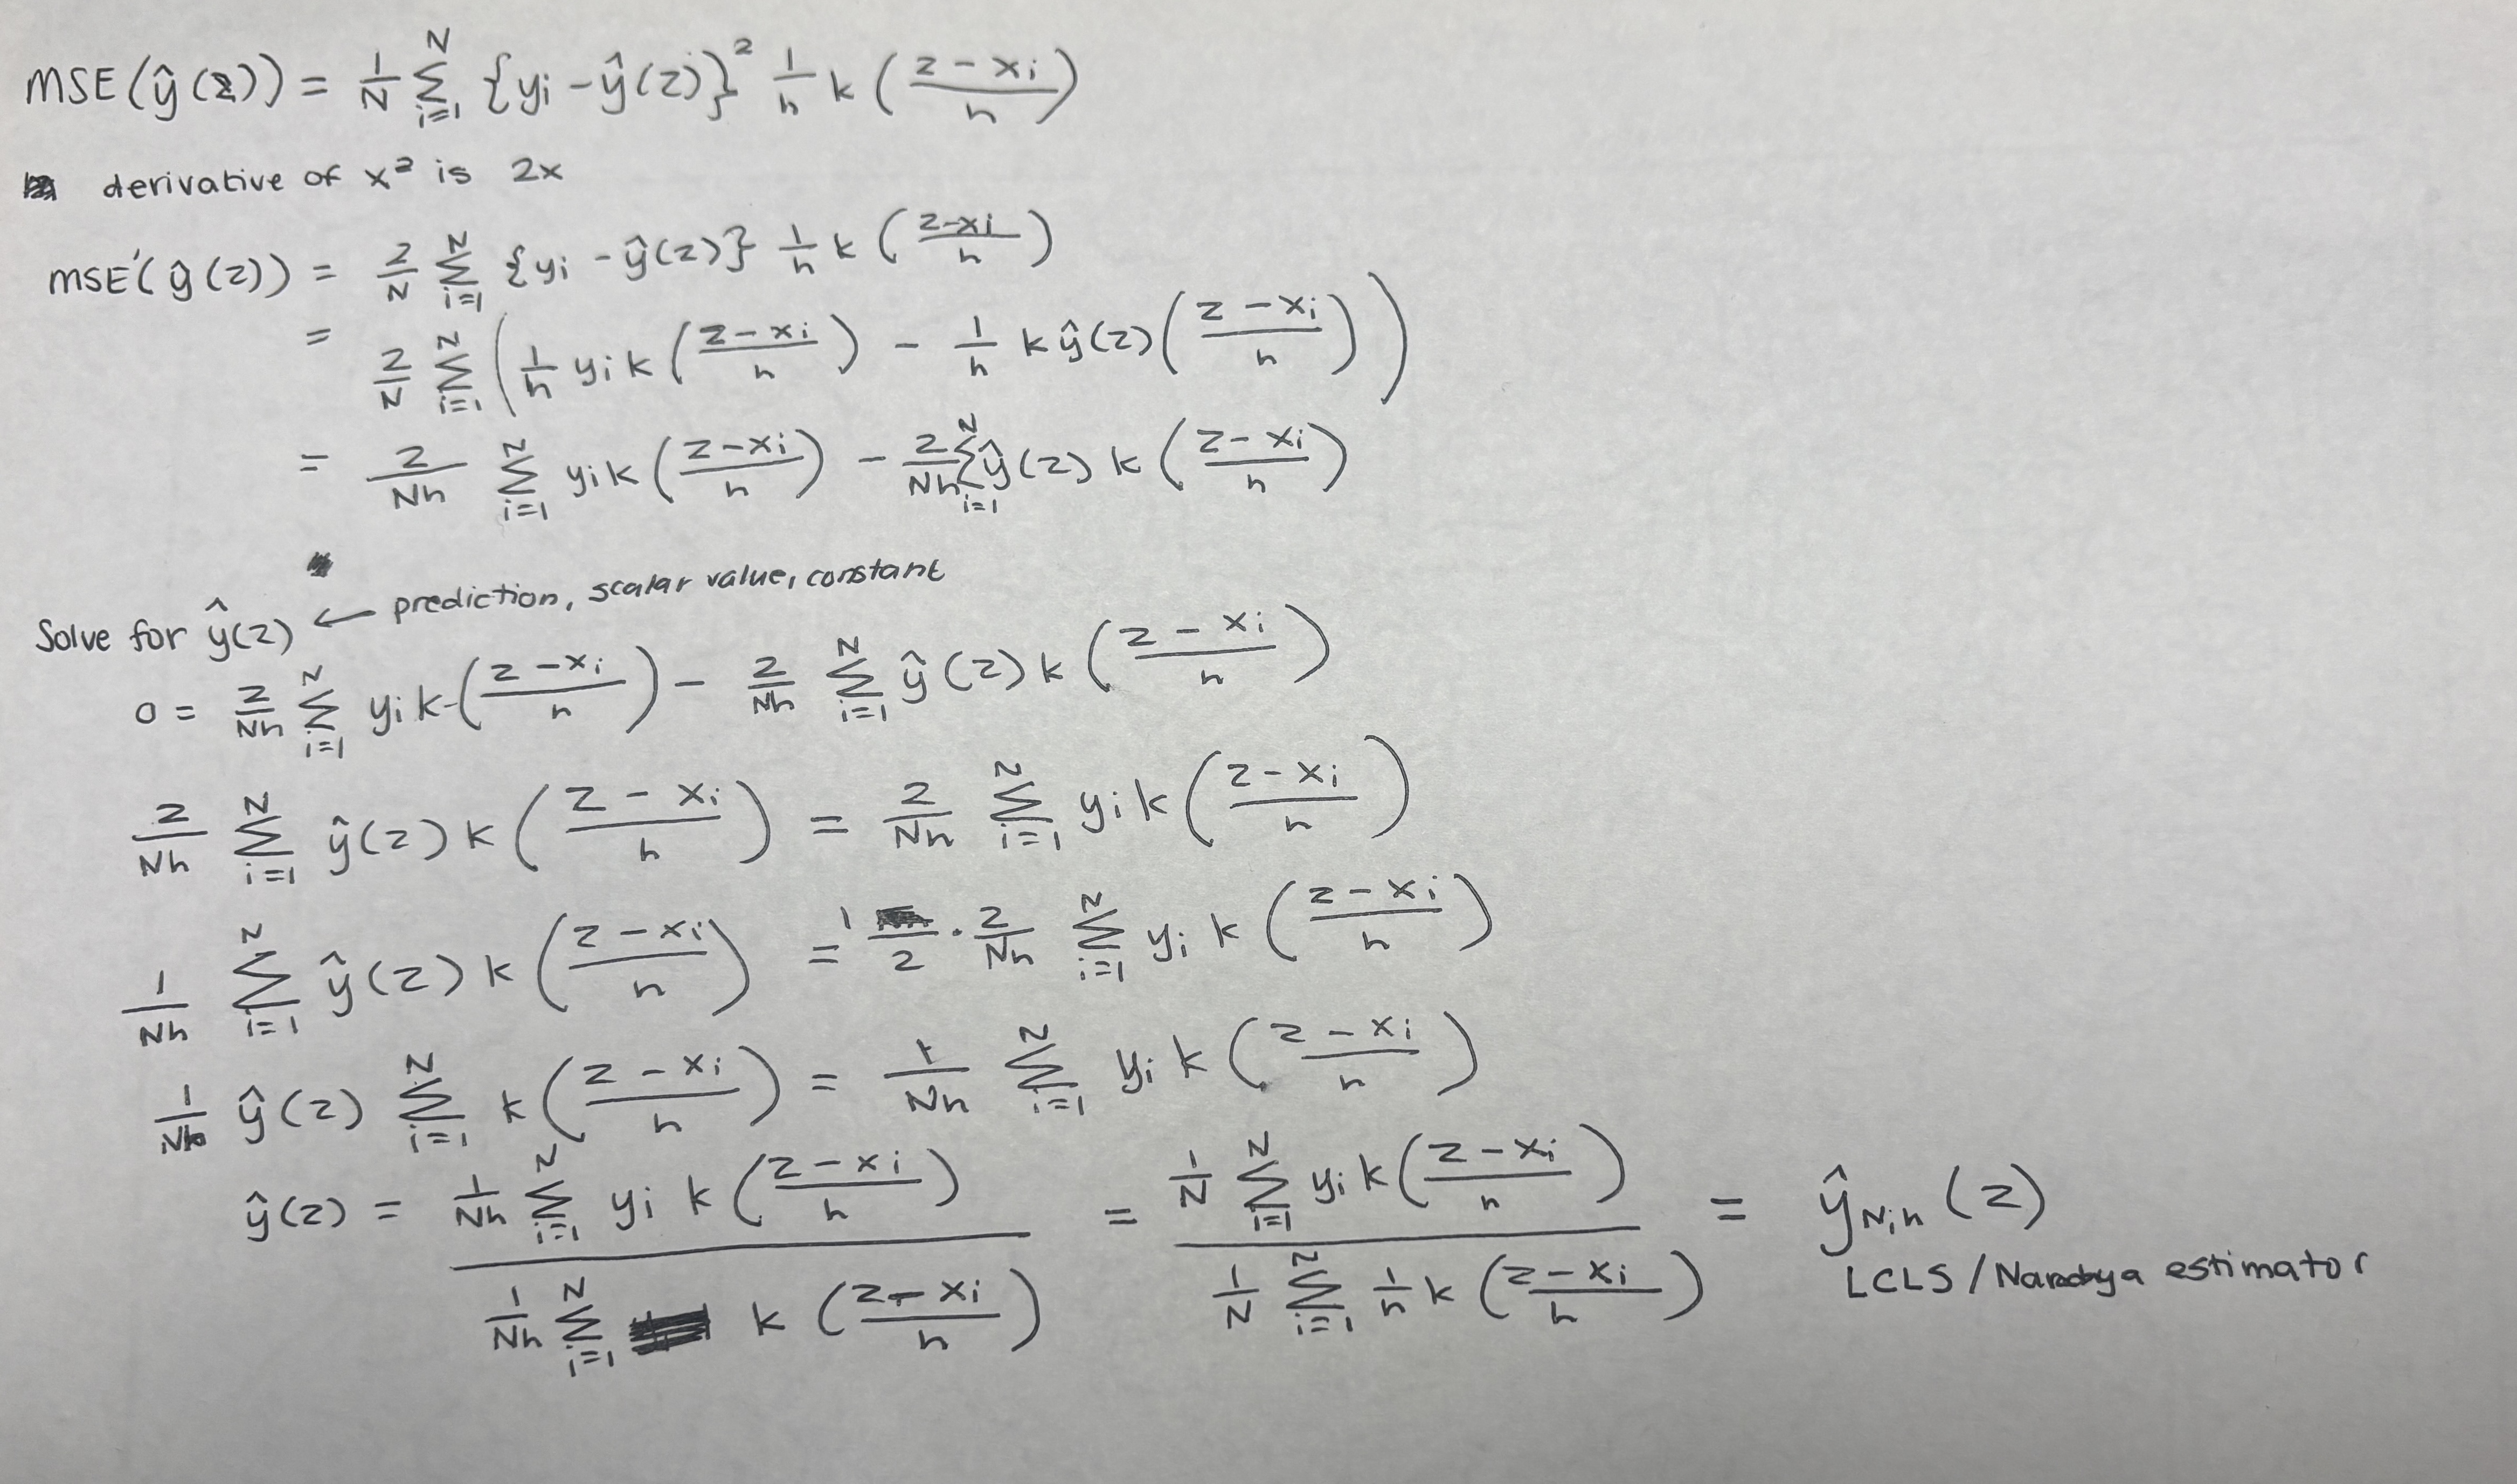

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [18]:
df = pd.read_csv('./data/ames_prices.csv')
df.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


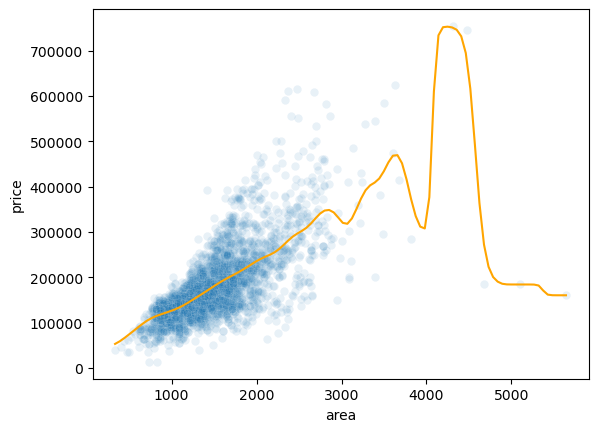

In [20]:
df = df.loc[:,['price', 'area']].dropna().reset_index()
y = df['price']
x = df['area']


def kernel(u):
    k = np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi) # gaussian kernel
    return k

def lcls(x,y):
    grid = np.linspace(x.min(), x.max(), 100)

    N = len(x)

    h = 1.06 * np.std(x) * N**(-0.2) # silverman bandwith estimate

    cef = [] 
    for z in grid: 
        num = 0 
        den = 0
        for i, data in enumerate(x):
            k_data = kernel( (z-data)/h )/(N*h) 
            den += k_data
            num += y[i] * k_data 
        y_hat_z = num/den
        cef.append(y_hat_z)


    sns.scatterplot(y=y,x=x,alpha = .1)
    sns.lineplot(x=grid,y=cef,color='orange')
    plt.show() 

lcls(x,y)

The estimator is reliable from when area is 0 to about where the area is 3000, where the data is most abundant and concentrated. This is because there are way less data points beyond that point and the points are farther apart causing the estimator to fluctuate as it tries to account for all of those points.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome